In [1]:
%cd ..

import numpy as np
from scripts.operator_approx import cheb_op_ap
from scripts.adjacency_to_super import create_super_adjacency, generate_opp_approx
import matplotlib.pyplot as plt
import pandas as pd
from scripts.ulams_method import ulams_method
from scripts.hofbauer_functions import create_adjacency_matricies

c:\Users\dbruw\DENR3901\DENR3901


In [2]:
alpha = 1.9

def tent_map(x):
    return alpha*np.minimum(x, 1-x)

# This is only the left branch. 
def L_left(phi):
    return lambda x: np.where((x >= 0) & (x <= alpha/2), (1/alpha)*(phi(x/alpha)), np.nan)

# This is only the right branch. 
def L_right(phi):
    return lambda x: np.where((x >= 0) & (x <= alpha/2), (1/alpha)*(phi(1-x/alpha)), np.nan)

# This is the full operator.
def L(phi):
    return lambda x: np.where((x >= 0) & (x <= alpha/2), (1/alpha)*(phi(x/alpha) + phi(1-x/alpha)), 0)

In [32]:
_ = create_adjacency_matricies(alpha, 22)
domains, _, left_matrix, right_matrix = _

In [33]:
# Takes the adjacecny matrix, the list of domains, and the trasnfer oprator and create the super adjacency matrix.

K = N = 100

super_adjacency_matrix_left = create_super_adjacency(left_matrix, domains, L_left, K, N, 1)
super_adjacency_matrix_right = create_super_adjacency(right_matrix, domains, L_right, K, N, 1)

super_adjacency_matrix = super_adjacency_matrix_left + super_adjacency_matrix_right

In [34]:
evals = np.linalg.eigvals(super_adjacency_matrix)
evals = evals[np.argsort(-np.abs(evals))]

In [35]:
L_hat = cheb_op_ap(L, 500, 500, (0, 1), (0, 1)).T
evals_full_map = np.linalg.eigvals(L_hat)
evals_full_map = evals_full_map[np.argsort(-np.abs(evals_full_map))]

In [36]:
L_ulam = ulams_method(1000, 10000, tent_map)
evals_ulam = np.linalg.eigvals(L_ulam)
evals_ulam = evals_ulam[np.argsort(-np.abs(evals_ulam))]

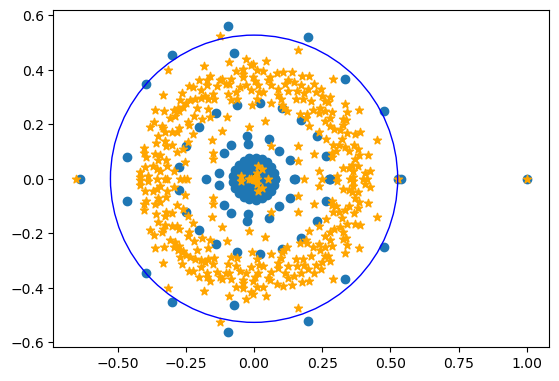

In [39]:
num = -1

plt.scatter(np.real(evals)[0:num], np.imag(evals)[0:num])
# plt.scatter(np.real(evals_full_map)[0:num], np.imag(evals_full_map)[0:num], color='red', marker='x')
plt.scatter(np.real(evals_ulam)[0:num], np.imag(evals_ulam)[0:num], color='orange', marker='*')
plt.gca().set_aspect('equal', adjustable='box')

circle = plt.Circle((0, 0), 1/alpha, color='blue', fill=False)
plt.gca().add_artist(circle)
plt.show()

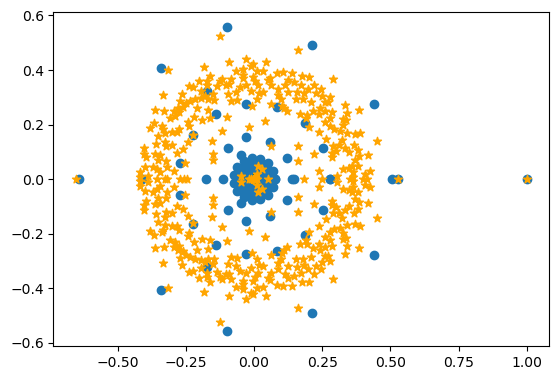

In [14]:
num = -1

plt.scatter(np.real(evals)[0:num], np.imag(evals)[0:num])
# plt.scatter(np.real(evals_full_map)[0:num], np.imag(evals_full_map)[0:num], color='red', marker='x')
plt.scatter(np.real(evals_ulam)[0:num], np.imag(evals_ulam)[0:num], color='orange', marker='*')
plt.gca().set_aspect('equal', adjustable='box')
plt.show()